In [9]:

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import zscore
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
np.set_printoptions(threshold=np.inf)




In [10]:

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# Load Data
print("Loading data...")
df = pd.read_csv('../data/train.csv')
df.columns = df.columns.str.strip()
display(df.head())
print(f"Initial data shape: {df.shape}")

# Clean all string/object columns: strip spaces, replace blanks with NaN
print("Cleaning string columns...")
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace({'': np.nan, 'nan': np.nan, 'NaN': np.nan})

# 3️⃣ Normalize Yes/No columns to consistent "Yes"/"No"
print("Normalizing Yes/No columns...")
yes_no_cols = ['CrossBorder_Shipping', 'Urgent_Shipping', 'Installation_Service',
               'Fragile_Equipment', 'Rural_Hospital']
for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].replace({
            'YES': 'Yes', 'yes': 'Yes', 'Y': 'Yes', 'y': 'Yes',
            'NO': 'No', 'no': 'No', 'N': 'No', 'n': 'No'
        })

# Convert date columns to datetime
print("Converting date columns...")
df['Order_Placed_Date'] = pd.to_datetime(df['Order_Placed_Date'], errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], errors='coerce')

# Create new feature: Delivery_Days (difference in days)
print("Engineering Delivery_Days feature...")
df['Delivery_Days'] = (df['Delivery_Date'] - df['Order_Placed_Date']).dt.days
df['Delivery_Days'] = pd.to_numeric(df['Delivery_Days'], errors='coerce')


print("Engineering more date features...")
df['Order_Month'] = df['Order_Placed_Date'].dt.month
df['Order_Day_of_Week'] = df['Order_Placed_Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Order_Is_Weekend'] = df['Order_Day_of_Week'].isin([5, 6])
# === END ADDED ===



# Drop exact duplicate rows
print("Dropping duplicates...")
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Dropped {before - after} duplicate rows.")

# Quick check after cleaning
print("\n" + "="*30)
print(" CLEANING & FEATURE ENGINEERING COMPLETE ")
print("="*30)
print(f"After basic cleaning shape: {df.shape}")

print("\nMissing values (raw count):")
print(df.isna().sum())


print("\nMissing values (percentage):")
missing_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
print(missing_pct[missing_pct > 0])


print("\nDataFrame head:")
display(df.head())

Loading data...


,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,3.62,17.13,No,No,No,Roadways,No,Working Class,No,10/20/17,10/20/17,APO AA 33776,179.50
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9703.37,35.42,No,Yes,Yes,Roadways,No,Working Class,No,02/22/16,02/24/16,"South Kevin, VT 84493",627732.45
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,40.21,18.54,No,No,No,Roadways,No,Working Class,No,01/11/18,01/10/18,"Kevinshire, NE 31279",1565.92
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,4.55,17.48,No,No,No,Roadways,No,Working Class,No,08/06/16,08/06/16,DPO AP 61572,257.71
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,2726.80,30.23,Yes,No,No,Roadways,No,Working Class,NaN,12/15/16,12/17/16,"Joshuamouth, AK 01550",8553.52


Initial data shape: (5000, 20)
Cleaning string columns...
Normalizing Yes/No columns...
Converting date columns...
Engineering Delivery_Days feature...
Engineering more date features...
Dropping duplicates...
Dropped 0 duplicate rows.

 CLEANING & FEATURE ENGINEERING COMPLETE 
After basic cleaning shape: (5000, 24)

Missing values (raw count):
Hospital_Id                0
Supplier_Name              0
Supplier_Reliability     587
Equipment_Height         283
Equipment_Width          443
Equipment_Weight         460
Equipment_Type           599
Equipment_Value            0
Base_Transport_Fee         0
CrossBorder_Shipping       0
Urgent_Shipping            0
Installation_Service       0
Transport_Method        1071
Fragile_Equipment          0
Hospital_Info              0
Rural_Hospital           586
Order_Placed_Date          0
Delivery_Date              0
Hospital_Location          0
Transport_Cost             0
Delivery_Days              0
Order_Month                0
Order_Day_of_Wee

,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,...,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost,Delivery_Days,Order_Month,Order_Day_of_Week,Order_Is_Weekend
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,3.62,17.13,No,...,Working Class,No,2017-10-20,2017-10-20,APO AA 33776,179.50,0,10,4,False
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9703.37,35.42,No,...,Working Class,No,2016-02-22,2016-02-24,"South Kevin, VT 84493",627732.45,2,2,0,False
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,40.21,18.54,No,...,Working Class,No,2018-01-11,2018-01-10,"Kevinshire, NE 31279",1565.92,-1,1,3,False
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,4.55,17.48,No,...,Working Class,No,2016-08-06,2016-08-06,DPO AP 61572,257.71,0,8,5,True
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,2726.80,30.23,Yes,...,Working Class,NaN,2016-12-15,2016-12-17,"Joshuamouth, AK 01550",8553.52,2,12,3,False



 STARTING EDA 
Numeric features identified: ['Supplier_Reliability', 'Equipment_Height', 'Equipment_Width', 'Equipment_Weight', 'Equipment_Value', 'Base_Transport_Fee']
Categorical features identified: ['Hospital_Id', 'Supplier_Name', 'Equipment_Type', 'CrossBorder_Shipping', 'Urgent_Shipping', 'Installation_Service', 'Transport_Method', 'Fragile_Equipment', 'Hospital_Info', 'Rural_Hospital', 'Hospital_Location', 'Order_Is_Weekend']
Date-derived features identified: ['Order_Month', 'Order_Day_of_Week', 'Delivery_Days']

===== 1. TARGET VARIABLE ANALYSIS: Transport_Cost =====


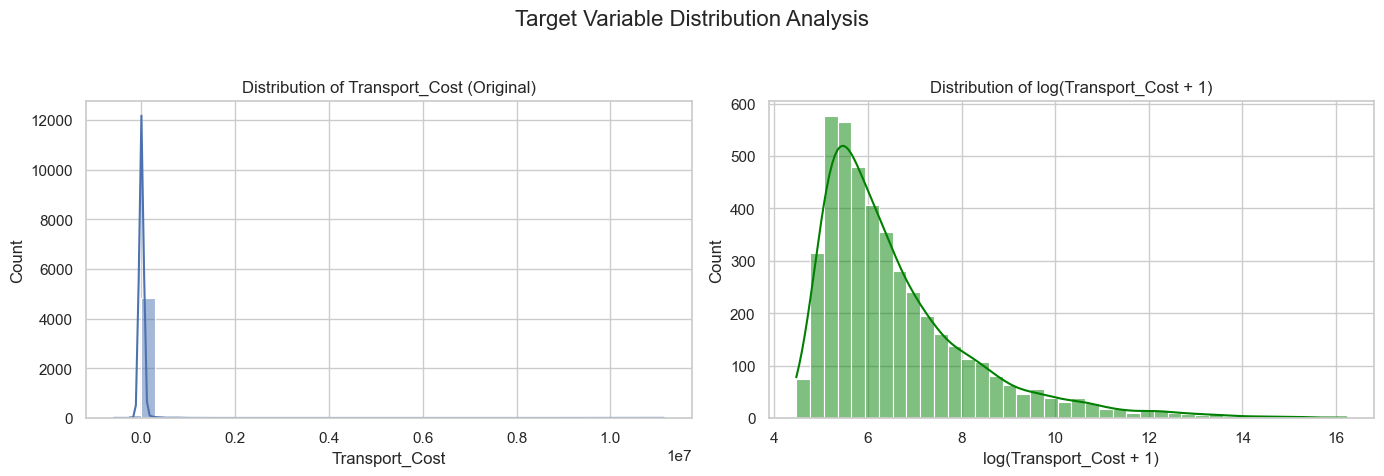

Skewness of Transport_Cost: 30.2661
Skewness of log(Transport_Cost + 1): 1.7668
===== BASIC NUMERIC STATISTICS =====


,count,mean,std,min,25%,50%,75%,max
Supplier_Reliability,4413.0,0.460925,2.659637e-01,0.0,0.23,0.450,0.6700,1.000000e+00
Equipment_Height,4717.0,21.759593,1.194443e+01,3.0,12.00,20.000,30.0000,7.300000e+01
Equipment_Width,4557.0,9.585034,5.407542e+00,2.0,6.00,8.000,12.0000,5.000000e+01
Equipment_Weight,4540.0,409758.435022,2.808640e+06,3.0,507.00,3137.500,36941.5000,1.179279e+08
Equipment_Value,5000.0,1190.293363,8.724804e+03,3.0,5.26,7.935,87.0475,3.823857e+05
Base_Transport_Fee,5000.0,37.374362,2.690791e+01,10.0,16.63,23.410,57.8050,9.998000e+01



===== SKEWNESS =====


Supplier_Reliability     0.144288
Equipment_Height         0.580025
Equipment_Width          1.595053
Equipment_Weight        22.595816
Equipment_Value         24.093047
Base_Transport_Fee       0.920960
dtype: float64


Generating numeric distribution plots...


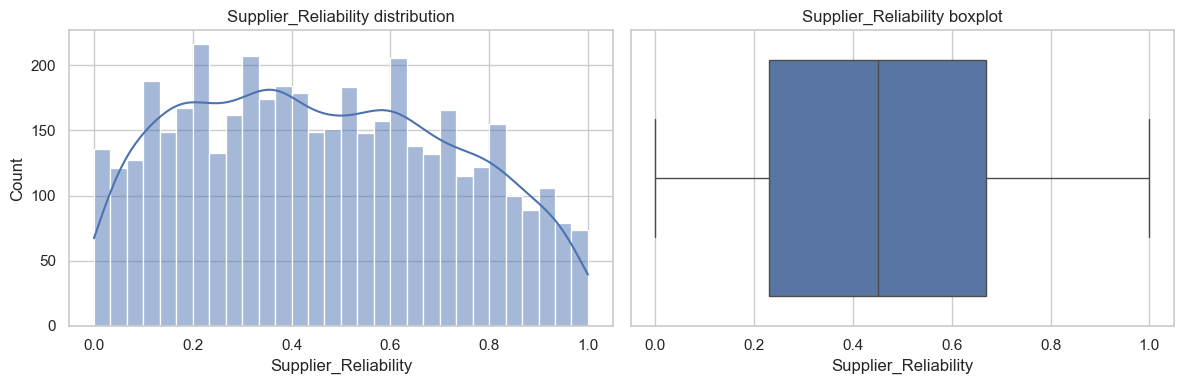

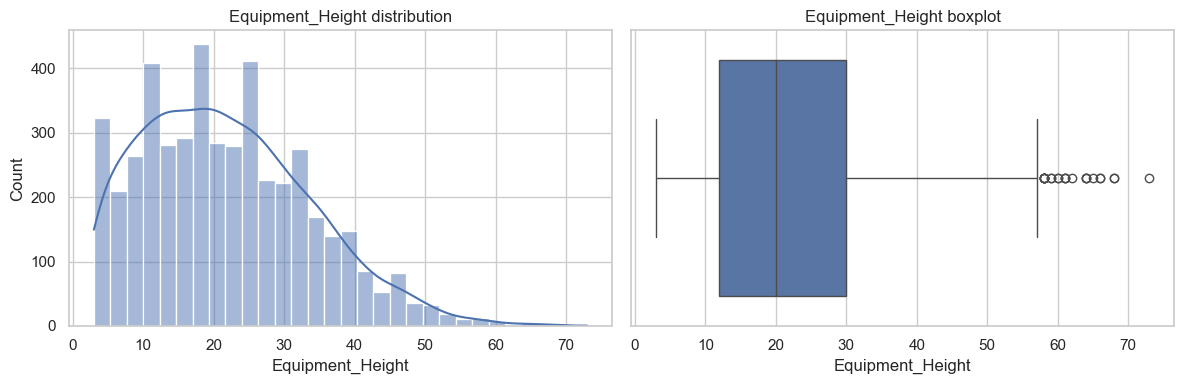

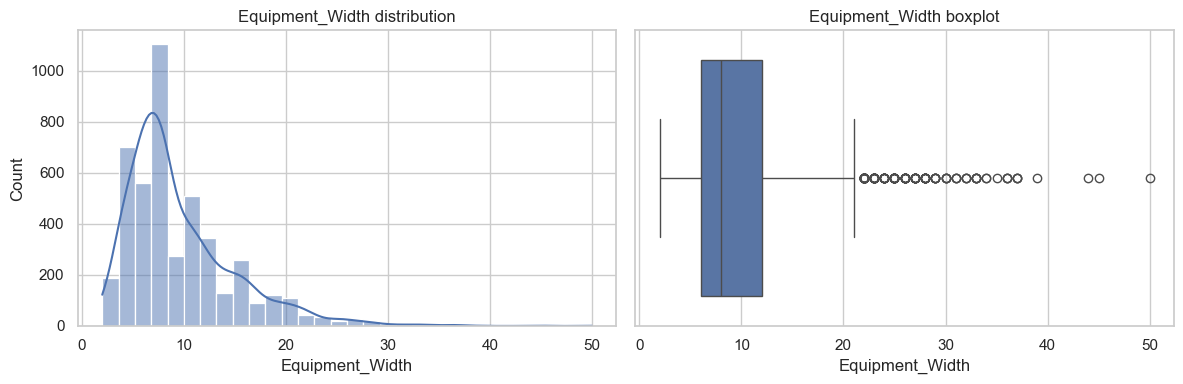

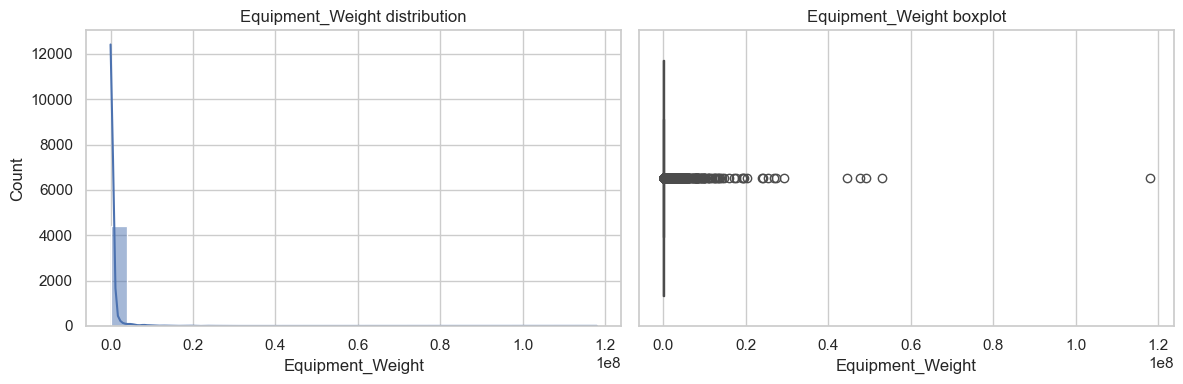

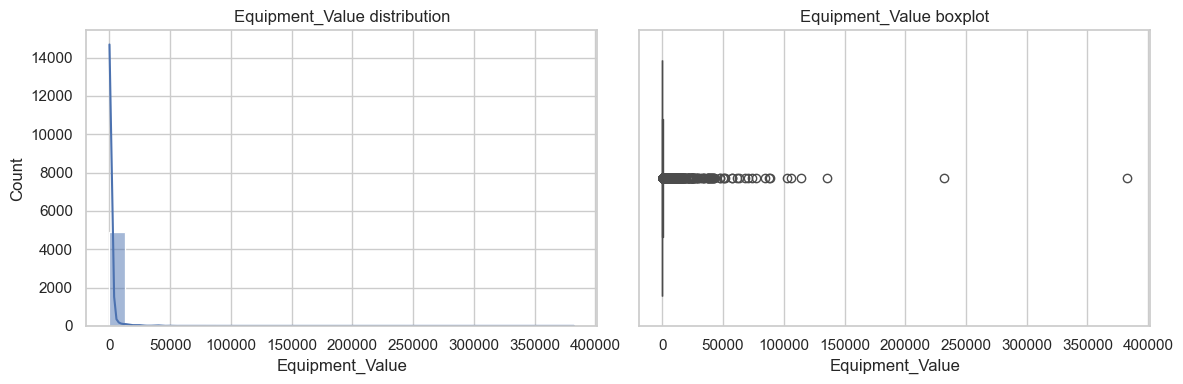

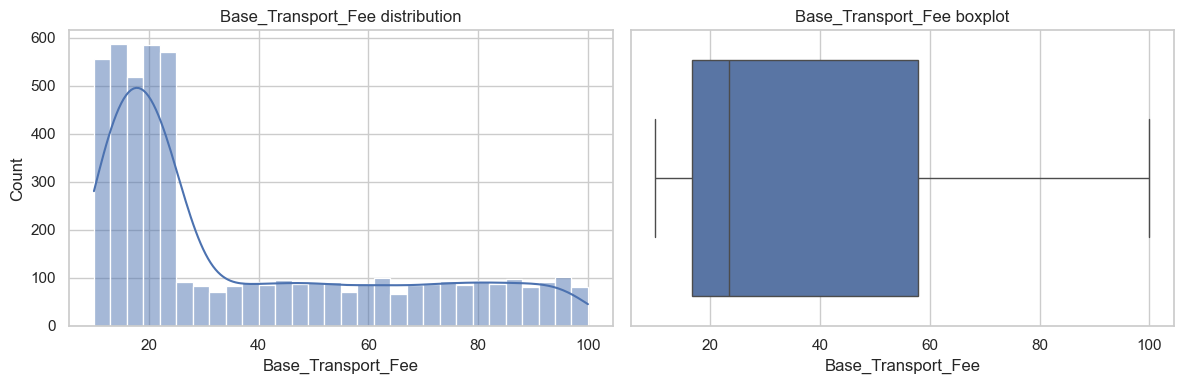

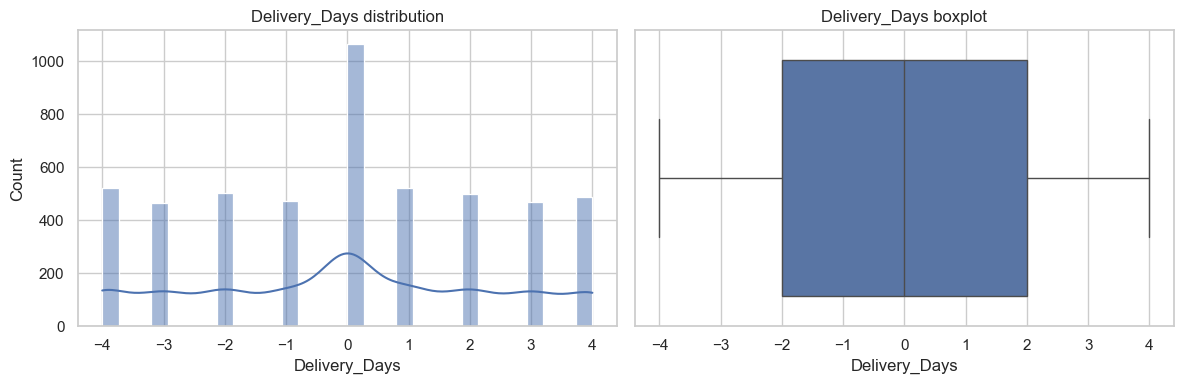

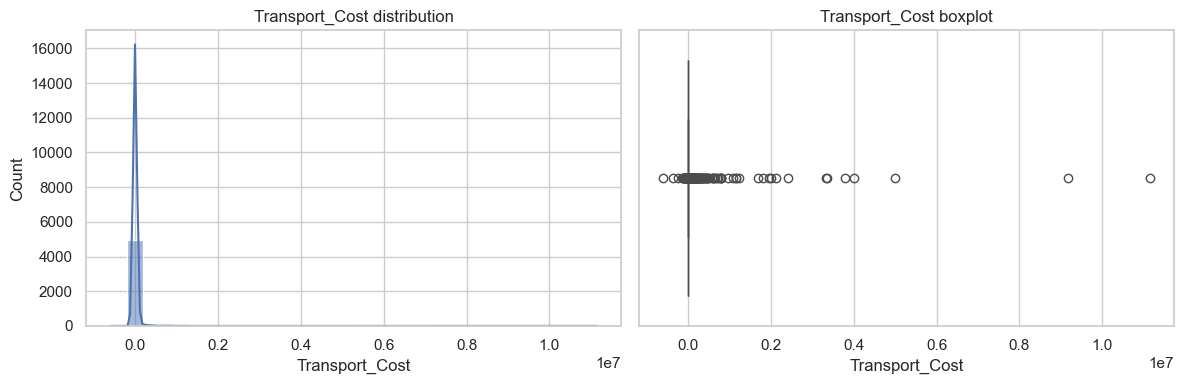


===== 3. CORRELATION ANALYSIS =====


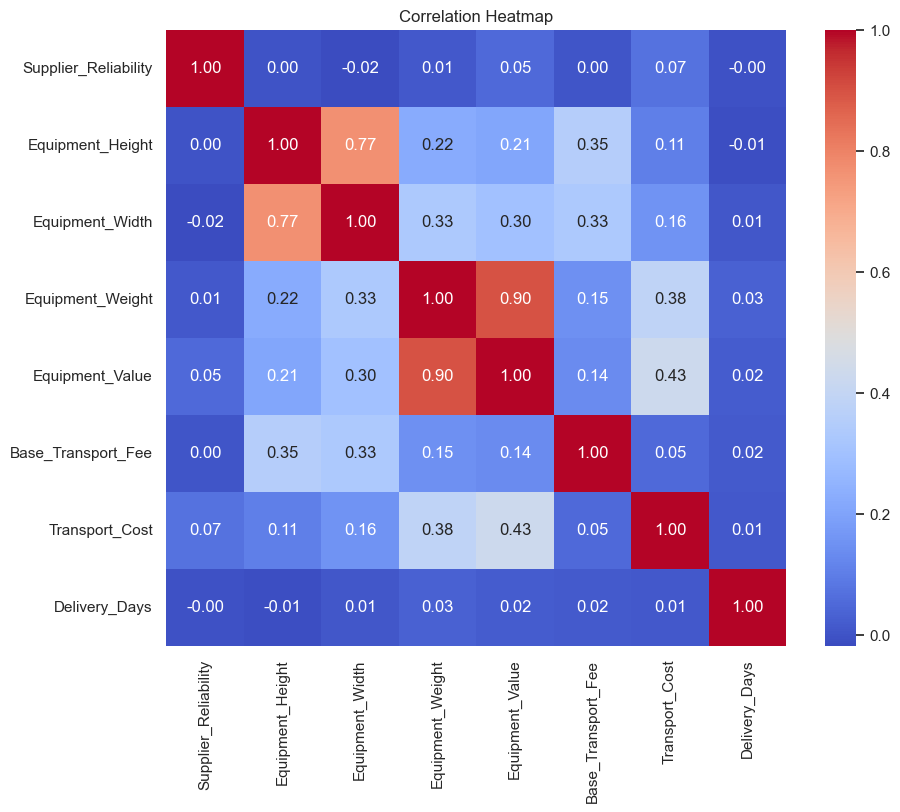


===== 4. CATEGORICAL FEATURE ANALYSIS =====

Generating categorical distribution plots...

===== Column: Hospital_Id =====
Hospital_Id
fffe3200360030003700    1
fffe3800360036003500    1
fffe3300360038003400    1
fffe3300360034003000    1
fffe3800380037003700    1
                       ..
fffe3900310038003500    1
fffe3900320035003000    1
fffe3400320035003900    1
fffe3100310039003200    1
fffe3100300038003300    1
Name: count, Length: 5000, dtype: int64
SKIPPING countplot for Hospital_Id (High Cardinality: 5000 unique values)

===== Column: Supplier_Name =====
Supplier_Name
James Moore         3
John Brown          3
James White         3
Robert Davis        3
Richard Williams    2
                   ..
Jesus Willett       1
Daniel Drew         1
Lavone Turner       1
Heather Smith       1
Jacob Buckley       1
Name: count, Length: 4966, dtype: int64
SKIPPING countplot for Supplier_Name (High Cardinality: 4966 unique values)

===== Column: Equipment_Type =====
Equipment_Type
Alumin

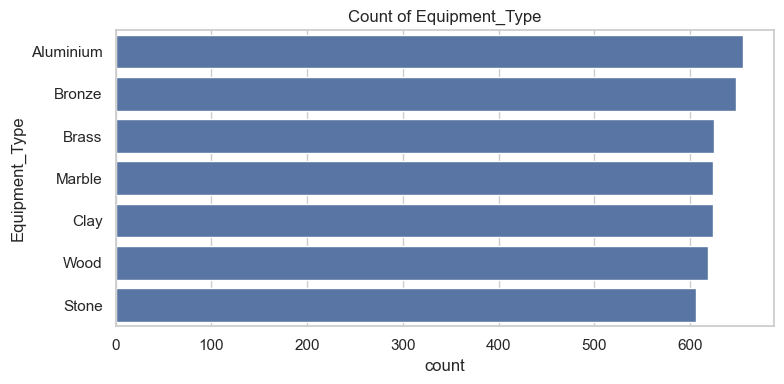


===== Column: CrossBorder_Shipping =====
CrossBorder_Shipping
No     3333
Yes    1667
Name: count, dtype: int64


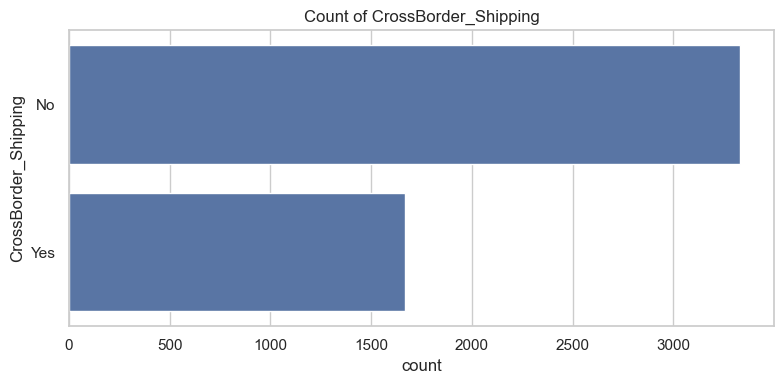


===== Column: Urgent_Shipping =====
Urgent_Shipping
No     3351
Yes    1649
Name: count, dtype: int64


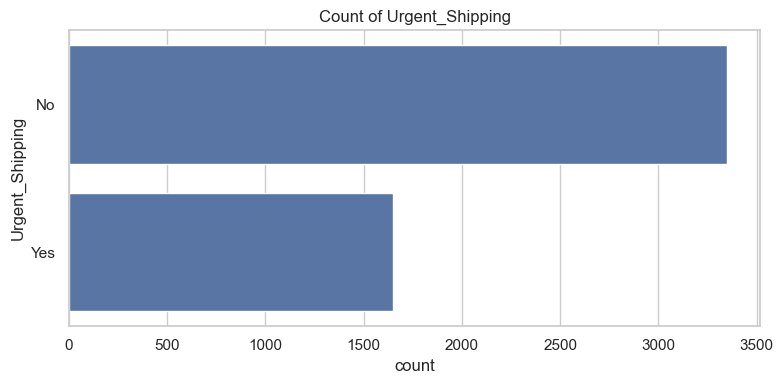


===== Column: Installation_Service =====
Installation_Service
No     2998
Yes    2002
Name: count, dtype: int64


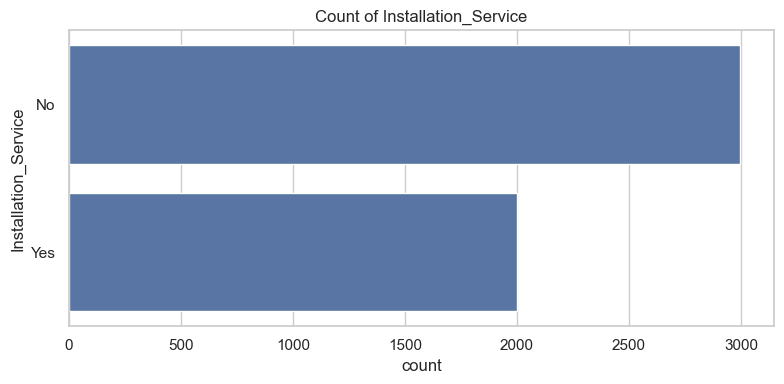


===== Column: Transport_Method =====
Transport_Method
Roadways     1604
Airways      1364
NaN          1071
Waterways     961
Name: count, dtype: int64


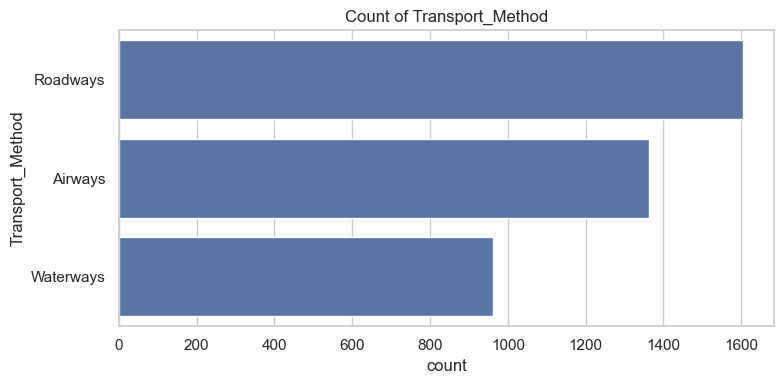


===== Column: Fragile_Equipment =====
Fragile_Equipment
No     4201
Yes     799
Name: count, dtype: int64


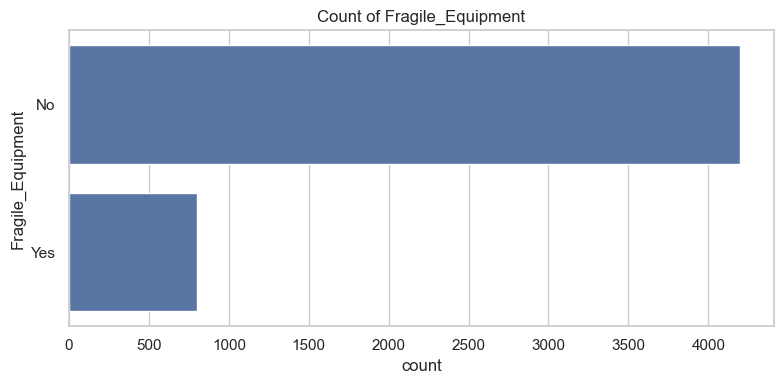


===== Column: Hospital_Info =====
Hospital_Info
Working Class    3672
Wealthy          1328
Name: count, dtype: int64


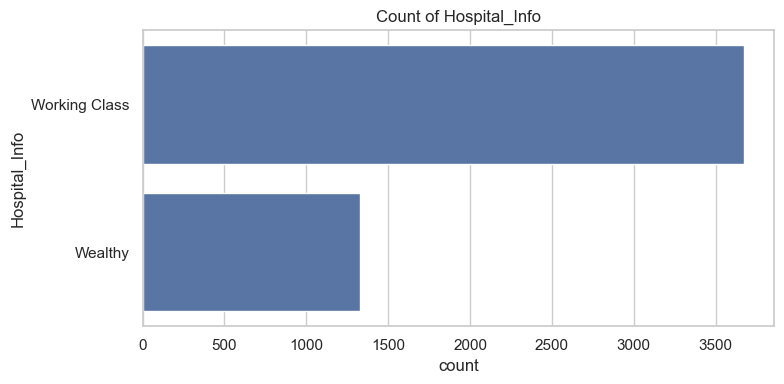


===== Column: Rural_Hospital =====
Rural_Hospital
No     3527
Yes     887
NaN     586
Name: count, dtype: int64


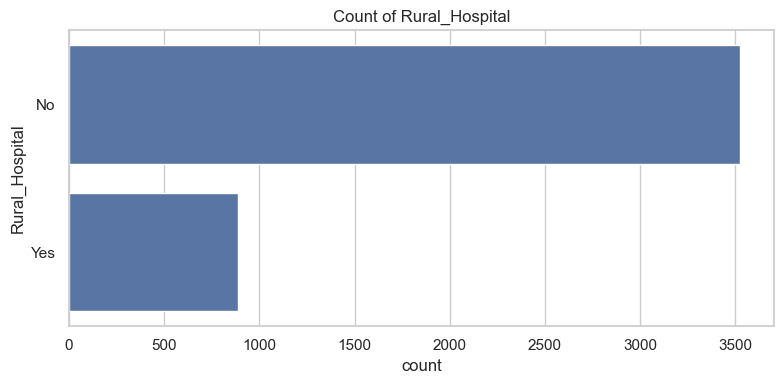


===== Column: Hospital_Location =====
Hospital_Location
APO AA 33776                    1
Mccarthychester, IN 50073       1
Port Reneechester, AK 34064     1
West Edwinfort, MI 23520        1
Christineburgh, IA 89541        1
                               ..
DPO AE 32198                    1
Port Alexis, MI 97721           1
East Amanda, AR 11497           1
North Michaelhaven, CO 04615    1
DPO AE 88710                    1
Name: count, Length: 5000, dtype: int64
SKIPPING countplot for Hospital_Location (High Cardinality: 5000 unique values)

===== Column: Order_Is_Weekend =====
Order_Is_Weekend
False    3591
True     1409
Name: count, dtype: int64


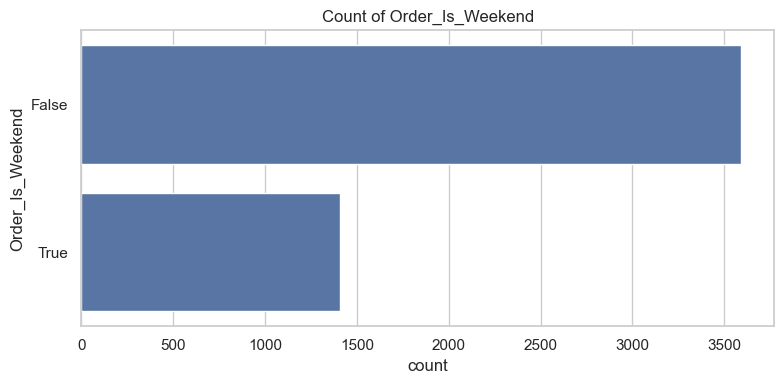


===== 4a. HIGH-CARDINALITY CATEGORICAL SUMMARY =====
High-cardinality features detected: ['Hospital_Id', 'Supplier_Name', 'Hospital_Location']

--- Top 10 values for: Hospital_Id ---
Hospital_Id
fffe3200360030003700    1
fffe3800360036003500    1
fffe3300360038003400    1
fffe3300360034003000    1
fffe3800380037003700    1
fffe330032003100        1
fffe3300300030003400    1
fffe3600350038003900    1
fffe3500320037003800    1
fffe3200350034003200    1
Name: count, dtype: int64
...and 4990 other unique values.

--- Top 10 values for: Supplier_Name ---
Supplier_Name
James Moore         3
John Brown          3
James White         3
Robert Davis        3
Richard Williams    2
Mary Stewart        2
Frank Lopez         2
Michael Johnson     2
Amy Smith           2
Ann Garcia          2
Name: count, dtype: int64
...and 4956 other unique values.

--- Top 10 values for: Hospital_Location ---
Hospital_Location
APO AA 33776                   1
Mccarthychester, IN 50073      1
Port Reneechester, A

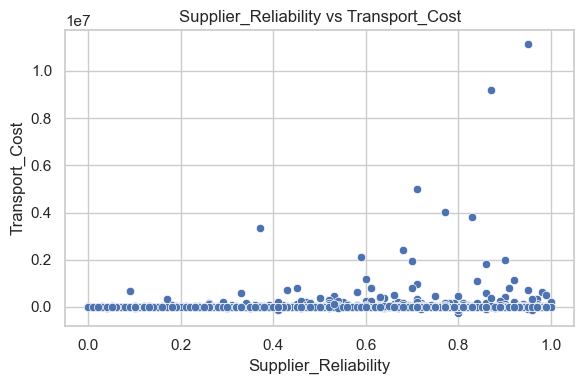

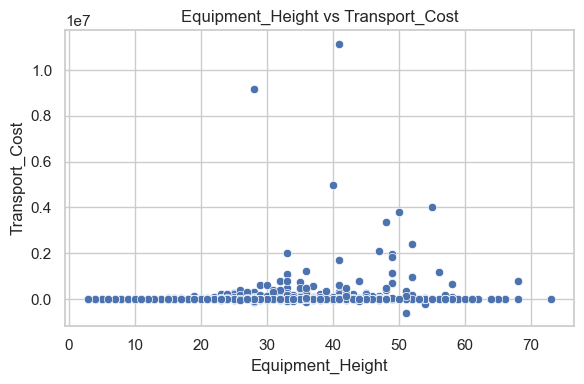

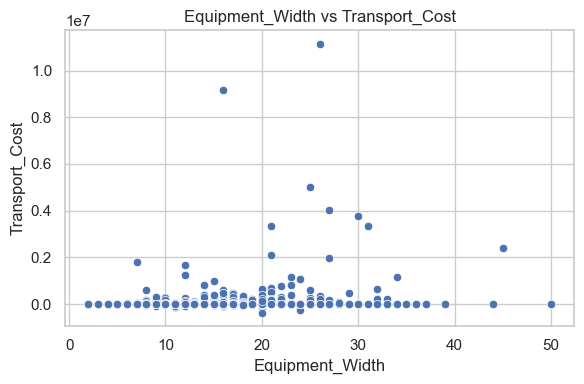

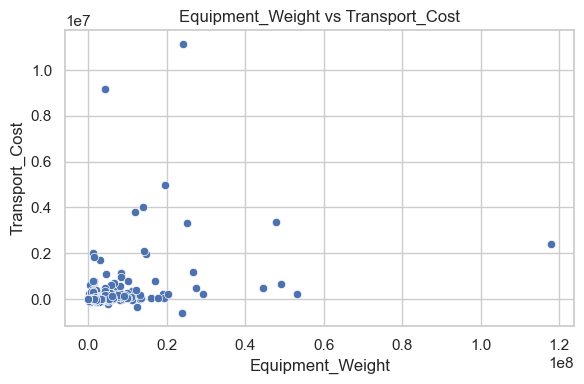

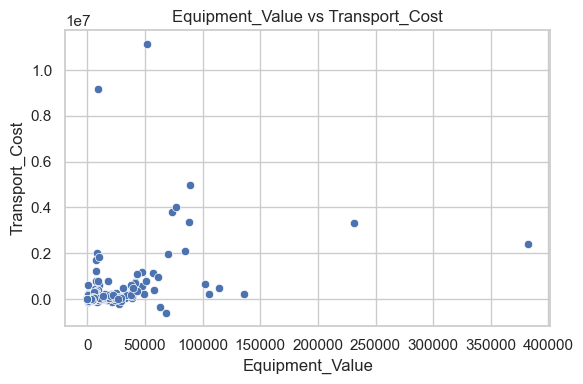

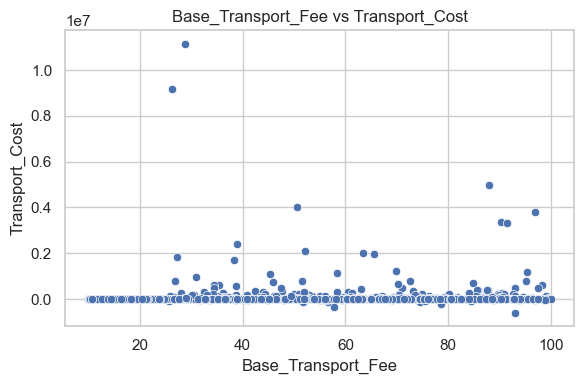

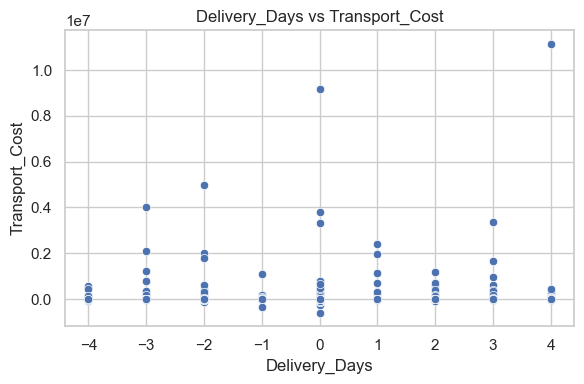


Generating categorical features vs. Transport_Cost...


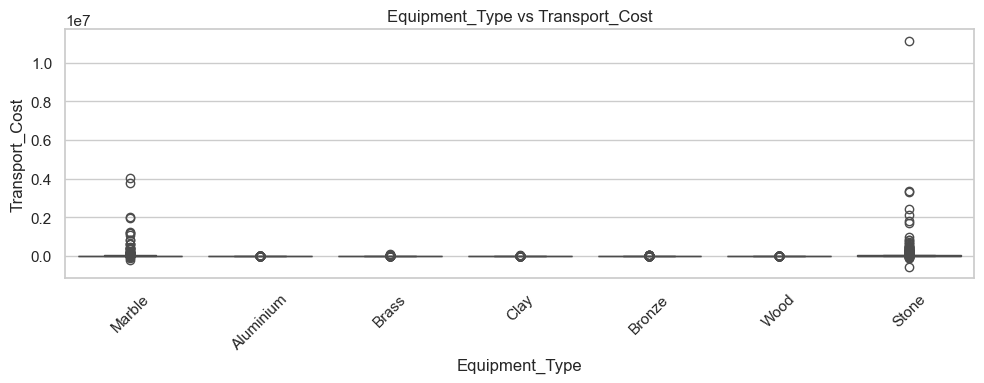

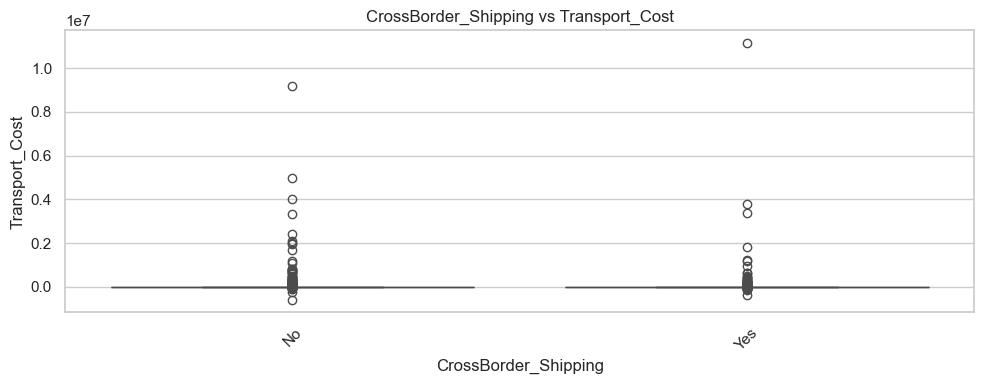

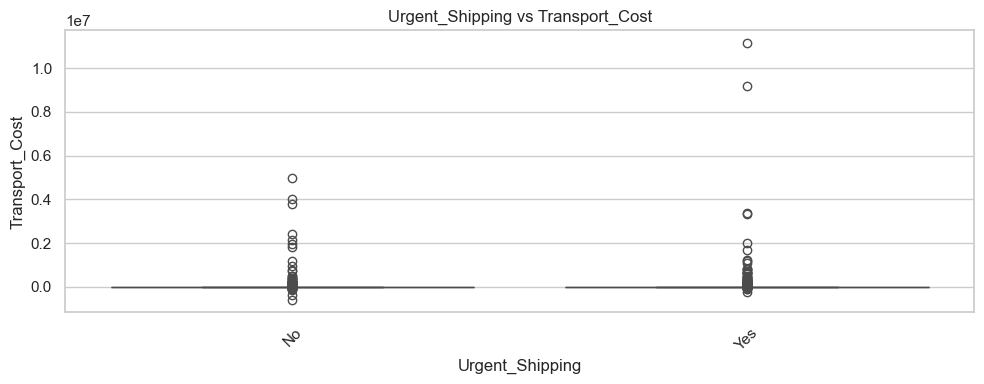

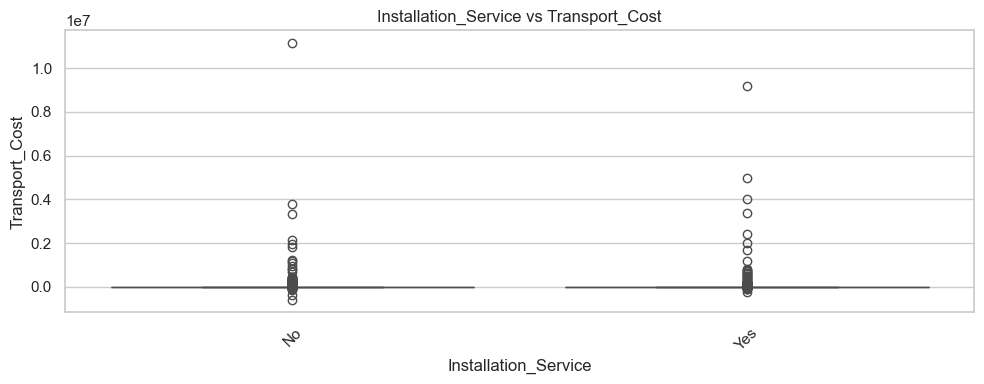

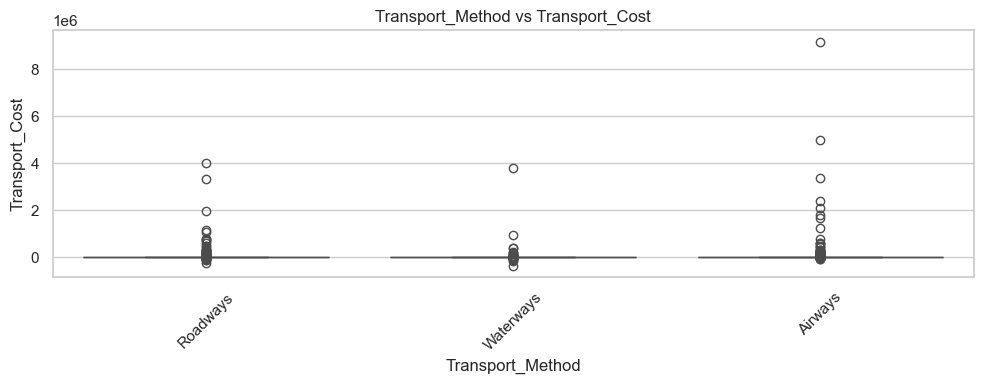

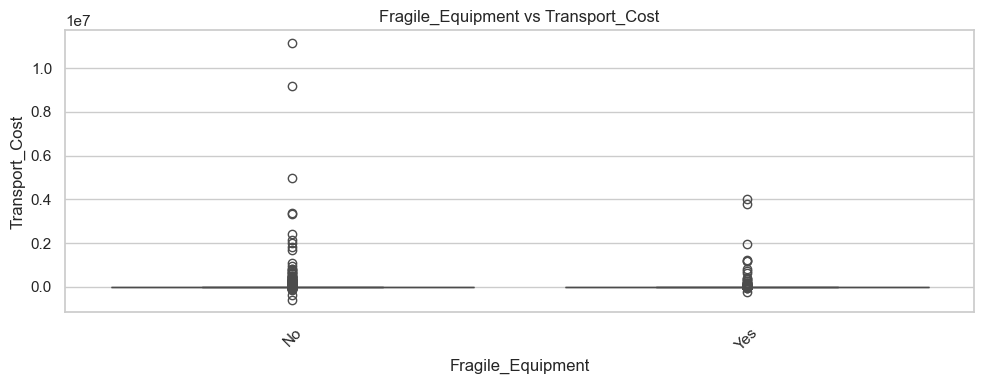

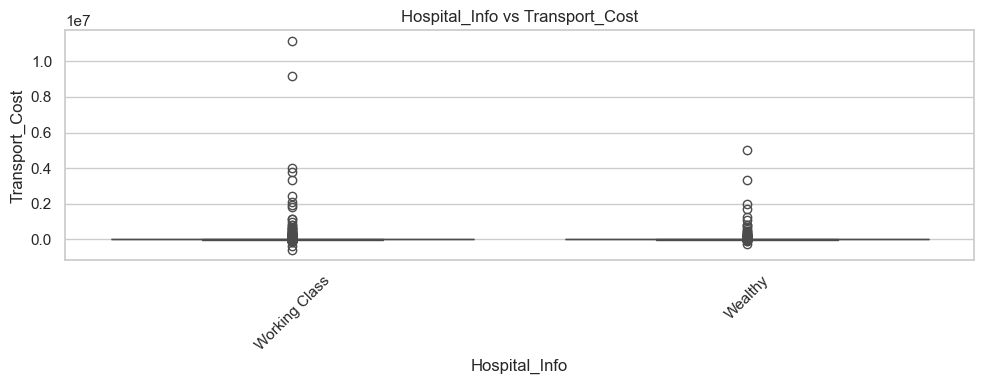

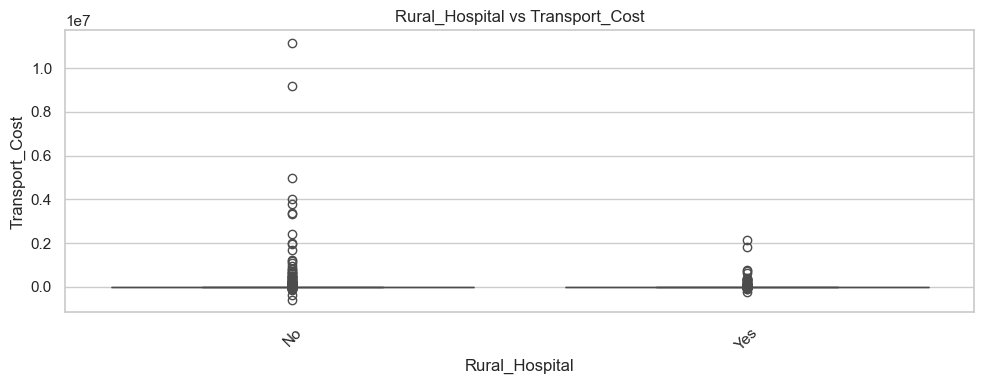

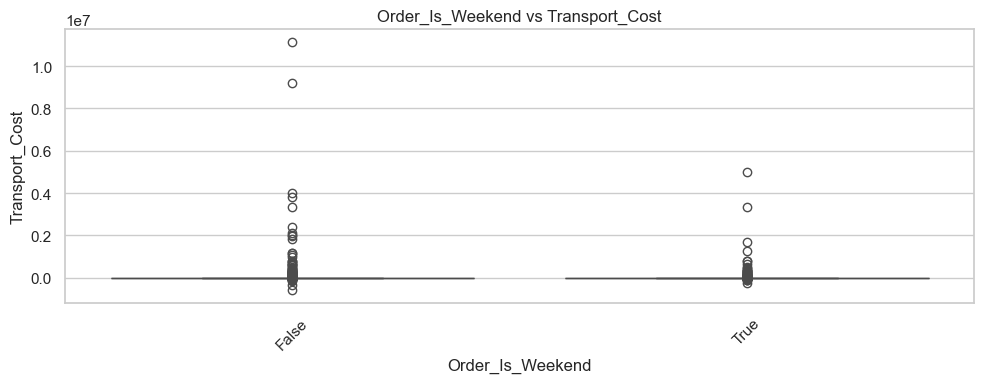


Generating date-derived features vs. Transport_Cost...


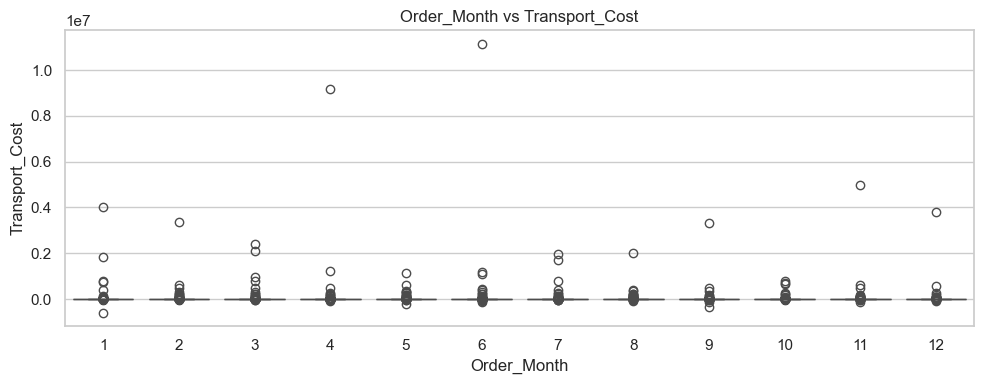

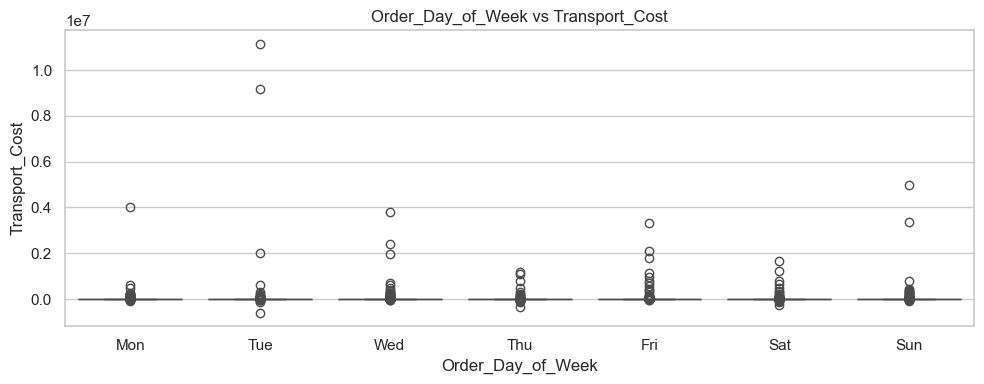

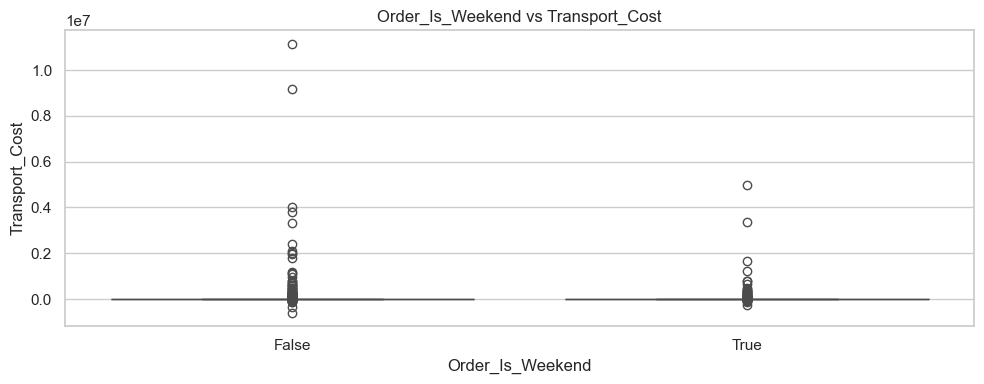


===== 6. OUTLIER DETECTION =====

===== NUMBER OF OUTLIERS PER COLUMN (Z-score > 3) =====
Equipment_Width     74
Equipment_Value     47
Equipment_Weight    42
Equipment_Height    23
Transport_Cost      22
dtype: int64

===== 7. MISSING VALUE VISUALIZATION =====

Generating missing value matrix...


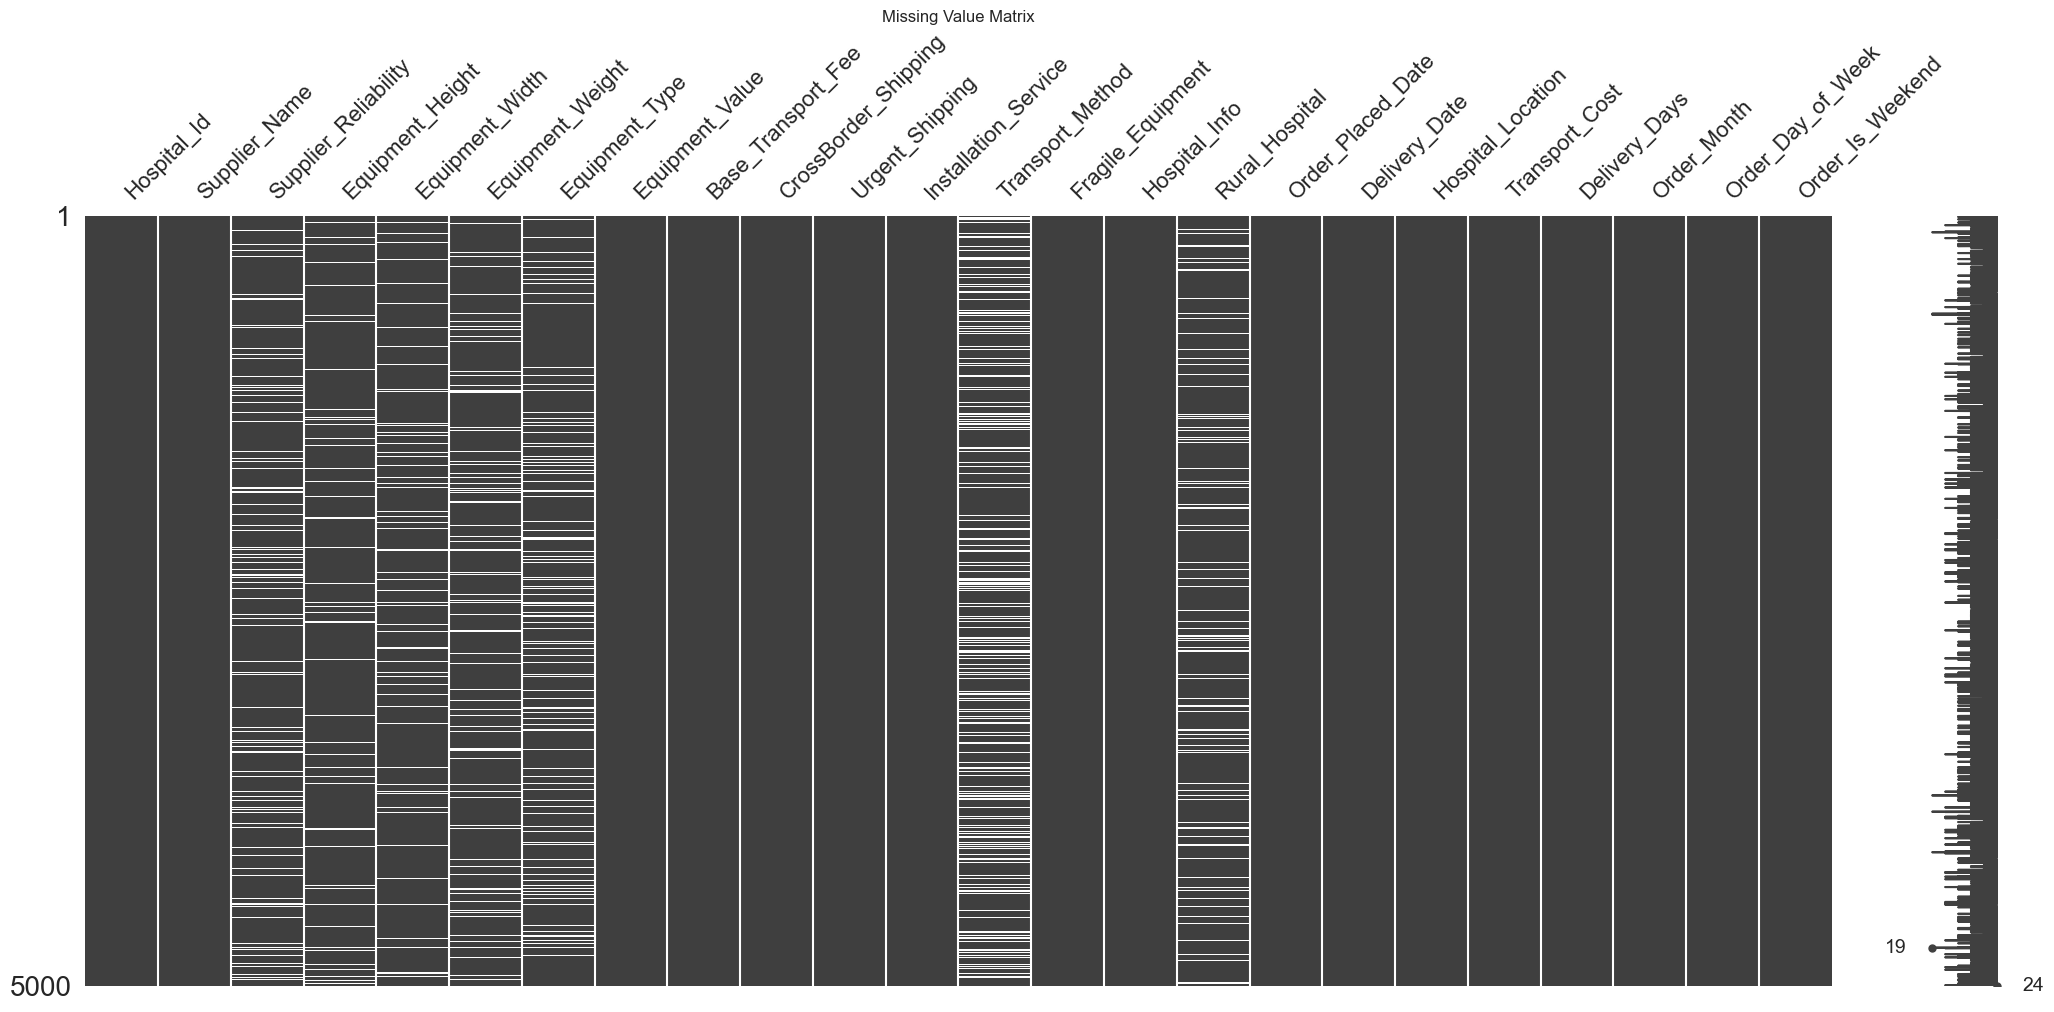


Generating missing value bar chart...


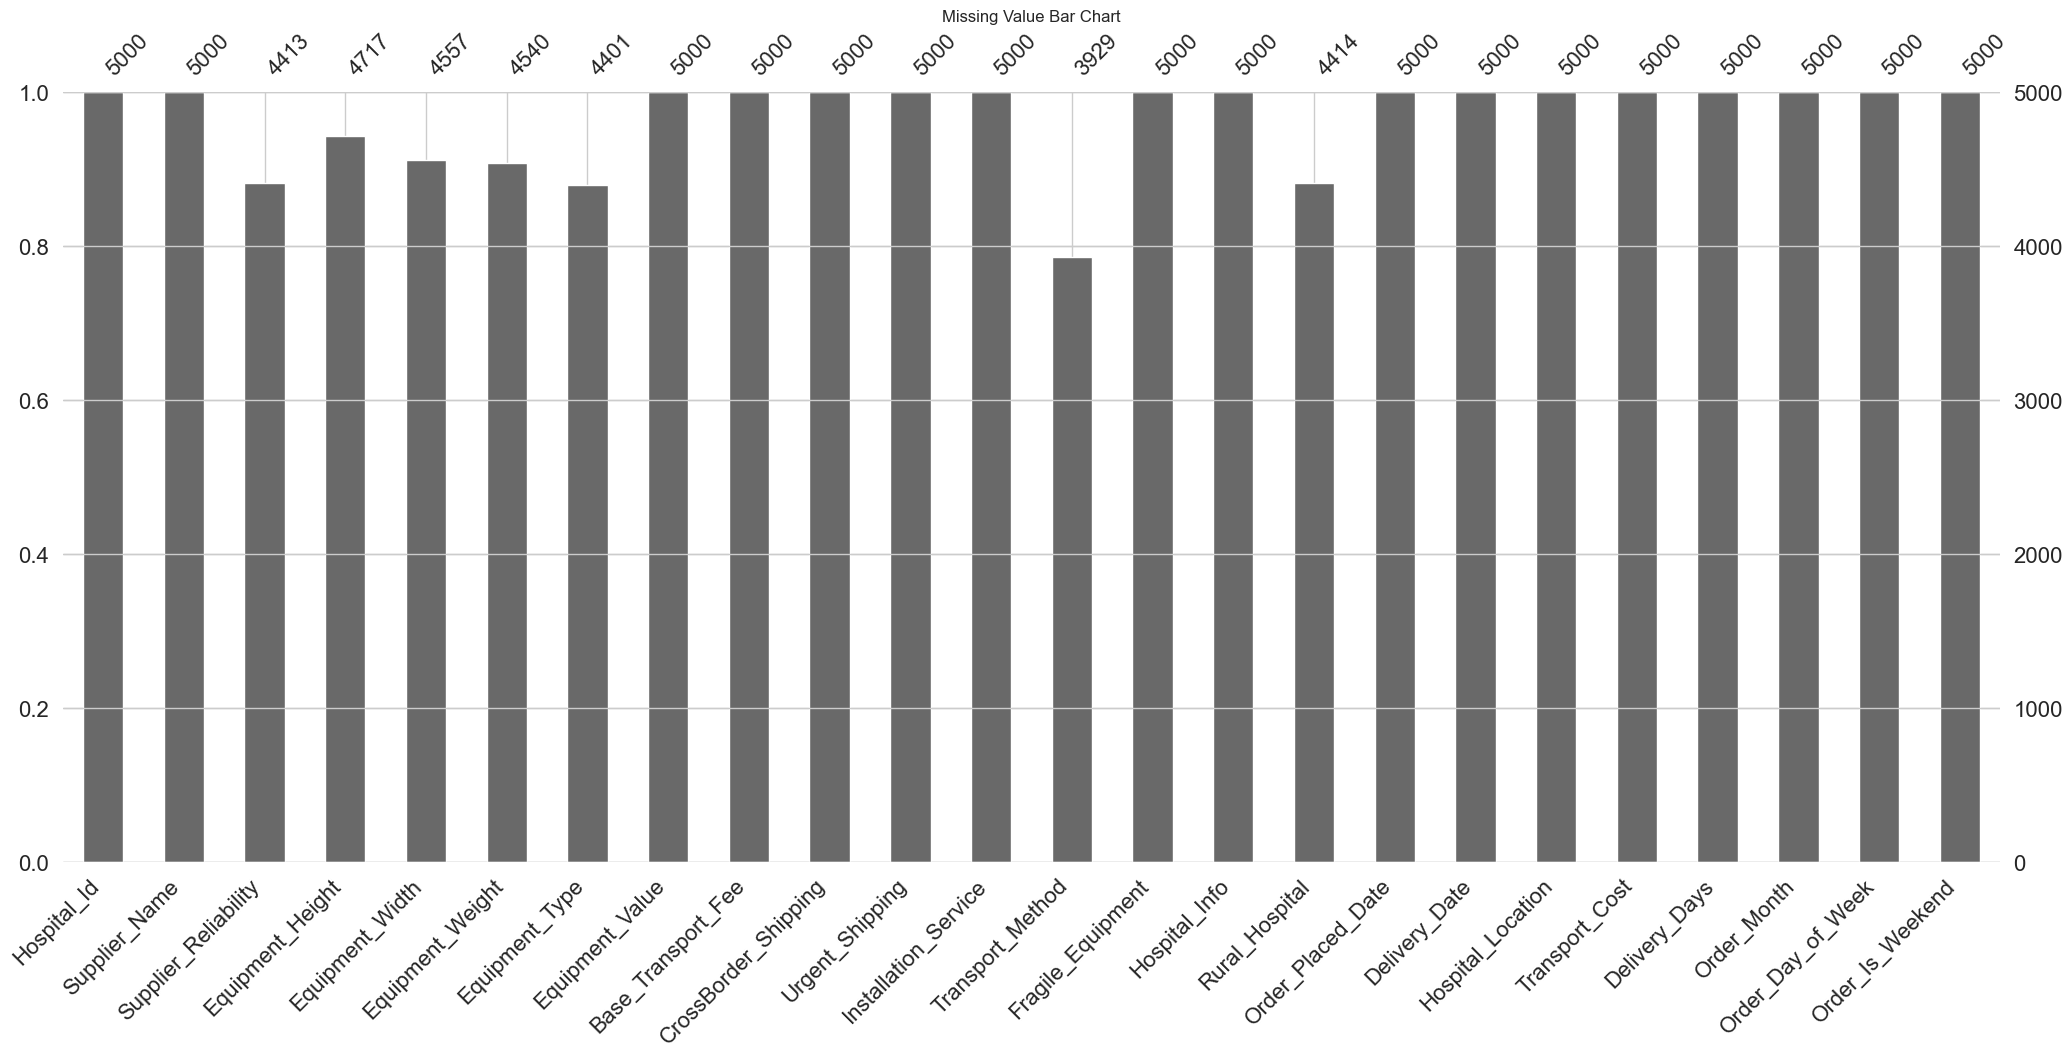

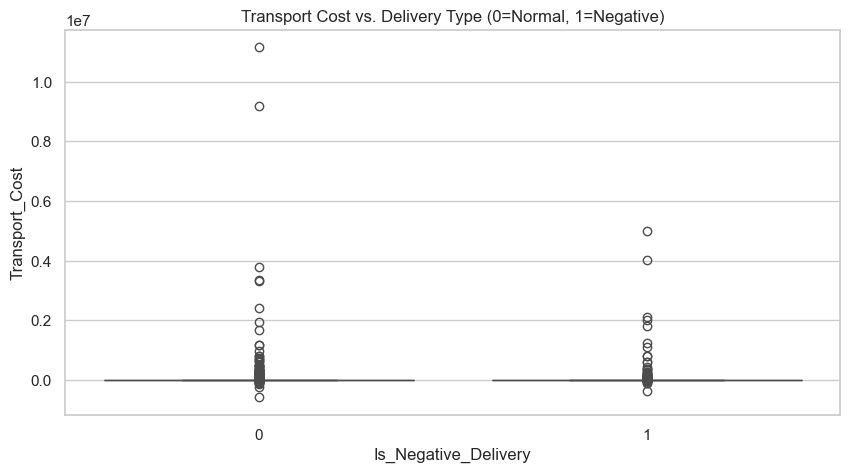

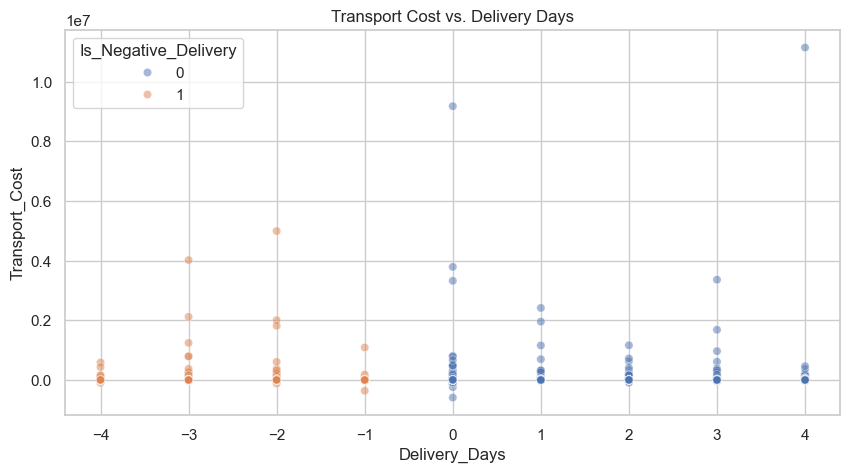

Found 493 rows with negative cost.

Top Suppliers in negative-cost rows:
Supplier_Name
Thomas Vazquez      1
Michael Dunnigan    1
Don Webster         1
Mae Bedard          1
Priscilla Hance     1
Name: count, dtype: int64

Top Suppliers in positive-cost rows:
Supplier_Name
James White      3
Robert Davis     3
John Brown       3
James Moore      3
Michael White    2
Name: count, dtype: int64

 EDA COMPLETE 


In [11]:

#START OF EXPLORATORY DATA ANALYSIS (EDA)

print("\n" + "="*30)
print(" STARTING EDA ")
print("="*30)

#Define column lists
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# === ADDED: Exclude new date features from 'num_cols' for general stats ===
date_num_features = ['Order_Month', 'Order_Day_of_Week', 'Delivery_Days']
for col in ['Transport_Cost'] + date_num_features:
    if col in num_cols:
        num_cols.remove(col)
        
cat_cols = df.select_dtypes(include='object').columns.tolist()
#ADDED: Add boolean 'Is_Weekend' to cat_cols for analysis 
if 'Order_Is_Weekend' in df.columns:
    cat_cols.append('Order_Is_Weekend')

print(f"Numeric features identified: {num_cols}")
print(f"Categorical features identified: {cat_cols}")
print(f"Date-derived features identified: {date_num_features}")


# Target Variable Analysis (Transport_Cost) 
print("\n===== 1. TARGET VARIABLE ANALYSIS: Transport_Cost =====")
plt.figure(figsize=(14, 5))

# Plot 1: Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Transport_Cost'], kde=True, bins=40)
plt.title('Distribution of Transport_Cost (Original)')
plt.xlabel('Transport_Cost')

# Plot 2: Log-Transformed Distribution
plt.subplot(1, 2, 2)
log_target = np.log1p(df['Transport_Cost'])
sns.histplot(log_target, kde=True, bins=40, color='green')
plt.title('Distribution of log(Transport_Cost + 1)')
plt.xlabel('log(Transport_Cost + 1)')

plt.suptitle('Target Variable Distribution Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(f"Skewness of Transport_Cost: {df['Transport_Cost'].skew():.4f}")
print(f"Skewness of log(Transport_Cost + 1): {log_target.skew():.4f}")


print("===== BASIC NUMERIC STATISTICS =====")
if not num_cols:
    print("No numeric columns found to describe (excluding target/dates).")
else:
    display(df[num_cols].describe().T)

    print("\n===== SKEWNESS =====")
    display(df[num_cols].skew())

# 🔹 Numeric distributions + boxplots
# (Your original loop)
# === MODIFIED: Added a check for empty list ===
print("\nGenerating numeric distribution plots...")
analysis_num_cols = num_cols + ['Delivery_Days'] # Add Delivery_Days back for plotting
if 'Transport_Cost' not in analysis_num_cols:
    analysis_num_cols.append('Transport_Cost') # Add Target back for plotting
    
for col in analysis_num_cols:
    if col in df.columns:
        plt.figure(figsize=(12,4))
        
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'{col} distribution')
        
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f'{col} boxplot')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found for plotting.")


print("\n===== 3. CORRELATION ANALYSIS =====")
#  Correlation heatmap
plt.figure(figsize=(10,8))
corr = df[num_cols + ['Transport_Cost', 'Delivery_Days']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


print("\n===== 4. CATEGORICAL FEATURE ANALYSIS =====")
#  Categorical distributions
print("\nGenerating categorical distribution plots...")
high_cardinality_cols = []
for col in cat_cols:
    print(f"\n===== Column: {col} =====")
    print(df[col].value_counts(dropna=False))
    
    nunique = df[col].nunique()
    if nunique > 20:
        high_cardinality_cols.append(col)
        print(f"SKIPPING countplot for {col} (High Cardinality: {nunique} unique values)")
        continue
        
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

print("\n===== 4a. HIGH-CARDINALITY CATEGORICAL SUMMARY =====")
if high_cardinality_cols:
    print(f"High-cardinality features detected: {high_cardinality_cols}")
    for col in high_cardinality_cols:
        print(f"\n--- Top 10 values for: {col} ---")
        print(df[col].value_counts(dropna=False).head(10))
        print(f"...and {df[col].nunique() - 10} other unique values.")
else:
    print("No high-cardinality categorical features detected (threshold > 20).")


print("\n===== 5. BIVARIATE ANALYSIS (FEATURES vs. TARGET) =====")
# Numeric features vs target

print("\nGenerating numeric features vs. Transport_Cost...")
for col in num_cols + ['Delivery_Days']:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df['Transport_Cost'])
        plt.title(f'{col} vs Transport_Cost')
        plt.tight_layout()
        plt.show()

# Categorical features vs target (low-cardinality)
print("\nGenerating categorical features vs. Transport_Cost...")
for col in cat_cols:
    if col in df.columns and df[col].nunique() < 20:
        plt.figure(figsize=(10,4))
        sns.boxplot(x=col, y='Transport_Cost', data=df)
        plt.title(f'{col} vs Transport_Cost')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Date-Derived Features vs. Target
print("\nGenerating date-derived features vs. Transport_Cost...")
date_features_to_plot = ['Order_Month', 'Order_Day_of_Week', 'Order_Is_Weekend']
for col in date_features_to_plot:
    if col in df.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=col, y='Transport_Cost', data=df)
        plt.title(f'{col} vs Transport_Cost')
        if col == 'Order_Day_of_Week':
            plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        plt.tight_layout()
        plt.show()


print("\n===== 6. OUTLIER DETECTION =====")
# Z-score method
try:
    z_scores = df[num_cols + ['Transport_Cost', 'Delivery_Days']].apply(lambda x: zscore(x, nan_policy='omit'))
    outliers = (abs(z_scores) > 3).sum()
    print("\n===== NUMBER OF OUTLIERS PER COLUMN (Z-score > 3) =====")
    print(outliers[outliers > 0].sort_values(ascending=False))
except ValueError as e:
    print(f"Could not calculate Z-scores, likely due to all-NaN column. Error: {e}")


print("\n===== 7. MISSING VALUE VISUALIZATION =====")
# Missing value visualization
print("\nGenerating missing value matrix...")
msno.matrix(df)
plt.title('Missing Value Matrix')
plt.show()

print("\nGenerating missing value bar chart...")
msno.bar(df)
plt.title('Missing Value Bar Chart')
plt.show()


df['Is_Negative_Delivery'] = (df['Delivery_Days'] < 0).astype(int)

# Create a boxplot to see the relationship
plt.figure(figsize=(10, 5))
sns.boxplot(x='Is_Negative_Delivery', y='Transport_Cost', data=df)
plt.title('Transport Cost vs. Delivery Type (0=Normal, 1=Negative)')
plt.show()

# Create a scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Delivery_Days', y='Transport_Cost', data=df, hue='Is_Negative_Delivery', alpha=0.5)
plt.title('Transport Cost vs. Delivery Days')
plt.show()


# Create a temporary dataframe of just the bad rows
df_negative_cost = df[df['Transport_Cost'] < 0].copy()

# Create a dataframe of the good rows for comparison
df_positive_cost = df[df['Transport_Cost'] >= 0].copy()

print(f"Found {len(df_negative_cost)} rows with negative cost.")



print("\nTop Suppliers in negative-cost rows:")
print(df_negative_cost['Supplier_Name'].value_counts().head())

print("\nTop Suppliers in positive-cost rows:")
print(df_positive_cost['Supplier_Name'].value_counts().head())


print("\n" + "="*30)
print(" EDA COMPLETE ")
print("="*30)

In [12]:
print("===== 1. INVESTIGATING NEGATIVE DURATION =====")
try:
    neg_days = df[df['Delivery_Days'] < 0]['Delivery_Days']
    print(f"Found {len(neg_days)} negative duration rows.")
    
    print("\n--- Top 10 most common negative values: ---")
    print(neg_days.value_counts().head(10))
    
    print("\n--- Stats for negative values (min, max, mean): ---")
    print(neg_days.describe())

except Exception as e:
    print(f"Error checking Delivery_Days: {e}")
    print("Hint: Make sure 'df' is your original DataFrame and 'Delivery_Days' is created.")


print("\n\n===== 2. INVESTIGATING NEGATIVE COST =====")
try:
    neg_costs = df[df['Transport_Cost'] < 0]['Transport_Cost']
    print(f"Found {len(neg_costs)} negative cost rows.")
    
    print("\n--- Top 10 most common negative values: ---")
    print(neg_costs.value_counts().head(10))
    
    print("\n--- Stats for negative values (min, max, mean): ---")
    print(neg_costs.describe())
    
except Exception as e:
    print(f"Error checking Transport_Cost: {e}")

===== 1. INVESTIGATING NEGATIVE DURATION =====
Found 1964 negative duration rows.

--- Top 10 most common negative values: ---
Delivery_Days
-4    522
-2    503
-1    473
-3    466
Name: count, dtype: int64

--- Stats for negative values (min, max, mean): ---
count    1964.000000
mean       -2.528004
std         1.123876
min        -4.000000
25%        -4.000000
50%        -3.000000
75%        -2.000000
max        -1.000000
Name: Delivery_Days, dtype: float64


===== 2. INVESTIGATING NEGATIVE COST =====
Found 493 negative cost rows.

--- Top 10 most common negative values: ---
Transport_Cost
-205.17     2
-190.70     2
-5592.07    1
-264.43     1
-123.57     1
-360.34     1
-211.10     1
-3673.54    1
-450.08     1
-371.58     1
Name: count, dtype: int64

--- Stats for negative values (min, max, mean): ---
count       493.000000
mean      -6151.206471
std       35227.590453
min     -588183.200000
25%       -1358.730000
50%        -448.220000
75%        -221.410000
max         -96.27000

In [13]:
print("===== 3. INVESTIGATING WEIGHT vs. VALUE =====")
try:
    # Calculate correlation
    correlation = df['Equipment_Weight'].corr(df['Equipment_Value'])
    print(f"Correlation (Weight vs. Value): {correlation:.4f}")

    # Check for missing/zero values in each
    weight_zeros = (df['Equipment_Weight'] == 0).sum()
    weight_nans = df['Equipment_Weight'].isna().sum()
    weight_missing_pct = (weight_zeros + weight_nans) / len(df) * 100
    
    value_zeros = (df['Equipment_Value'] == 0).sum()
    value_nans = df['Equipment_Value'].isna().sum()
    value_missing_pct = (value_zeros + value_nans) / len(df) * 100

    print(f"\n--- Missing Data Stats ---")
    print(f"Equipment_Weight: {weight_missing_pct:.2f}% missing (as 0 or NaN)")
    print(f"Equipment_Value:  {value_missing_pct:.2f}% missing (as 0 or NaN)")

except Exception as e:
    print(f"Error checking Weight vs. Value: {e}")


print("\n\n===== 4. INVESTIGATING HEIGHT vs. WIDTH =====")
try:
    # Calculate correlation
    correlation = df['Equipment_Height'].corr(df['Equipment_Width'])
    print(f"Correlation (Height vs. Width): {correlation:.4f}")

    # Check for missing/zero values in each
    height_zeros = (df['Equipment_Height'] == 0).sum()
    height_nans = df['Equipment_Height'].isna().sum()
    height_missing_pct = (height_zeros + height_nans) / len(df) * 100
    
    width_zeros = (df['Equipment_Width'] == 0).sum()
    width_nans = df['Equipment_Width'].isna().sum()
    width_missing_pct = (width_zeros + width_nans) / len(df) * 100

    print(f"\n--- Missing Data Stats ---")
    print(f"Equipment_Height: {height_missing_pct:.2f}% missing (as 0 or NaN)")
    print(f"Equipment_Width:  {width_missing_pct:.2f}% missing (as 0 or NaN)")

except Exception as e:
    print(f"Error checking Height vs. Width: {e}")

===== 3. INVESTIGATING WEIGHT vs. VALUE =====
Correlation (Weight vs. Value): 0.8992

--- Missing Data Stats ---
Equipment_Weight: 9.20% missing (as 0 or NaN)
Equipment_Value:  0.00% missing (as 0 or NaN)


===== 4. INVESTIGATING HEIGHT vs. WIDTH =====
Correlation (Height vs. Width): 0.7660

--- Missing Data Stats ---
Equipment_Height: 5.66% missing (as 0 or NaN)
Equipment_Width:  8.86% missing (as 0 or NaN)
